## Simulation examples

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
})

from simulation import TestingBiasSimulator

N_FEATS = 2
eps = 1e-6
mu0 = 0.35
mu1 = 0.55
sigma = 0.05

sim = TestingBiasSimulator(
    N_FEATS,
    0.2, # smallest meaningful threshold size change
    label_threshold_group0=1.,
    label_threshold_group1=1.,
    test_threshold_group0=1, # controls P[T | A=0, X]
    test_threshold_group1=1.2, # controls P[T | A=1, X]
    mu0=np.ones(N_FEATS) * mu0,
    mu1=np.ones(N_FEATS) * mu1,
    sigma=sigma * np.eye(N_FEATS), # affects P[Y | X]
    seed=43,
)



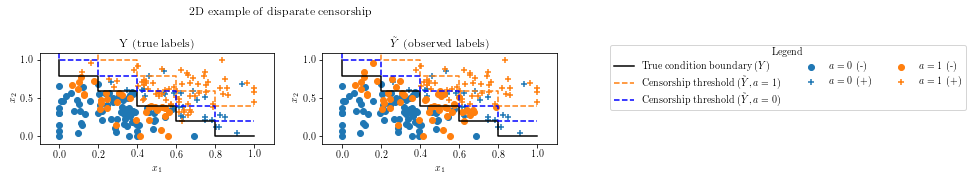

In [22]:
# Fig. 6
X, inp, A, T, labels, obs_labels = sim.simulate(100)
group0, group1 = X[A==0], X[A==1]
fig, ax = plt.subplots(1, 2, figsize=(8, 2.5))

plt.suptitle("2D example of disparate censorship")

ax[0].set_xlim((-0.1, 1.1))
ax[0].set_ylim((-0.1, 1.1))
ax[0].set_xlabel("$x_1$")
ax[0].set_ylabel("$x_2$")


ax[0].set_title("Y (true labels)")
ax[0].scatter(*zip(*group0[labels[:len(group0)]==0]), marker='o', color='tab:blue', label='$a=0$ (-)')
ax[0].scatter(*zip(*group0[labels[:len(group0)]==1]), marker='+', color='tab:blue', label='$a=0$ (+)')
ax[0].scatter(*zip(*group1[labels[len(group1):]==0]), marker='o', color='tab:orange', label='$a=1$ (-)')
ax[0].scatter(*zip(*group1[labels[len(group1):]==1]), marker='+', color='tab:orange', label='$a=1$ (+)')
ax[0].step(np.linspace(0, 1, 6), np.linspace(1, 0, 6), color='black', where='pre', label=r'True condition boundary ($Y$)')
ax[0].step(np.linspace(0, 1, 6), np.linspace(ct1, ct1-1, 6), color='tab:orange', linestyle='dashed', where='pre', label=r'Censorship threshold ($\tilde{Y}, a=1$)')
ax[0].step(np.linspace(0, 1, 6), np.linspace(ct, ct-1, 6), color='blue', linestyle='dashed', where='pre', label=r'Censorship threshold ($\tilde{Y}, a=0$)')    

ax[1].set_xlim((-0.1, 1.1))
ax[1].set_ylim((-0.1, 1.1))
ax[1].set_xlabel("$x_1$")
ax[1].set_ylabel("$x_2$")

ax[1].set_title(r"$\tilde{Y}$ (observed labels)")
ax[1].scatter(*zip(*group0[obs_labels[:len(group0)]==0]), marker='o', color='tab:blue')
ax[1].scatter(*zip(*group0[obs_labels[:len(group0)]==1]), marker='+', color='tab:blue')
ax[1].scatter(*zip(*group1[obs_labels[len(group1):]==0]), marker='o', color='tab:orange')
ax[1].scatter(*zip(*group1[obs_labels[len(group1):]==1]), marker='+', color='tab:orange')
ax[1].step(np.linspace(0, 1, 6), np.linspace(1, 0, 6), color='black', where='pre')
ax[1].step(np.linspace(0, 1, 6), np.linspace(ct1, ct1-1, 6), color='tab:orange', linestyle='dashed', where='pre')
ax[1].step(np.linspace(0, 1, 6), np.linspace(ct, ct-1, 6), color='blue', linestyle='dashed', where='pre')    


lgd = fig.legend(bbox_to_anchor=(1.7, 0.8), ncol=3, title="Legend")
fig.tight_layout()
plt.savefig("figures/example_disparate_censorship.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [11]:
def plot_boundaries_only(title=None):
    _, ax = plt.subplots(figsize=(5, 2.5))
    ax.set_xlim((-0.1, 1.1))
    ax.set_ylim((-0.1, 1.3))
    plt.title(None)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$")
    plt.title(title)
    plt.step(np.linspace(0, 1, 6), np.linspace(1, 0, 6), color='black', where='pre', label='Optimal boundary ($Y$)')
    plt.step(np.linspace(0, 1, 6), np.linspace(ct1, ct1-1, 6), color='tab:orange', linestyle='dashed', where='pre', label=r'Censorship threshold ($\tilde{Y}, a=1$)')
    plt.step(np.linspace(0, 1, 6), np.linspace(ct, ct-1, 6), color='blue', linestyle='dashed', where='pre', label=r'Censorship threshold ($\tilde{Y}, a=0$)')    
    plt.legend(bbox_to_anchor=(1., 1.), ncol=1)
    plt.savefig("figures/example_boundaries.pdf", bbox_inches='tight')
    plt.show()
    

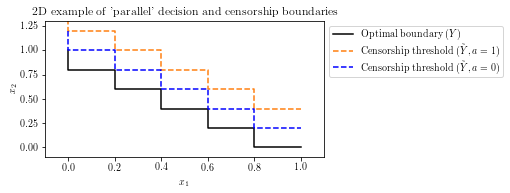

In [12]:
# Fig. 5
plot_boundaries_only(title="2D example of 'parallel' decision and censorship boundaries")